# Introdução ao Seaborn
    Seguindo tutorial do próprio seaborn [Link](https://seaborn.pydata.org/introduction.html)


## Primeiro Plot

In [1]:
import seaborn as sns

### Aplicando o tema default

sns.set_theme()

### Utilizando um dataset já disponível para load

tips = sns.load_dataset("tips")

### vendo dataset

tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


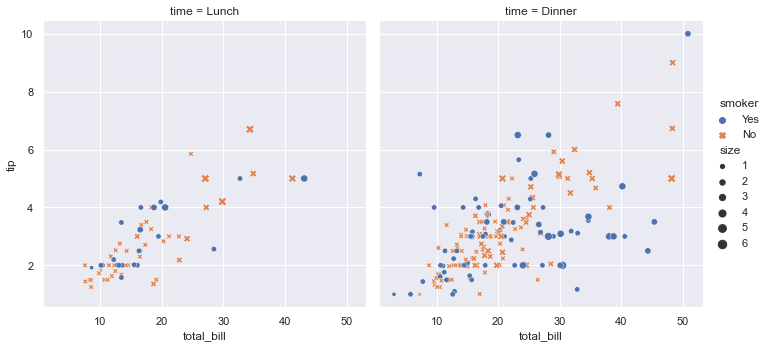

In [11]:
### Criando visualização dos dados

sns.relplot(data = tips,
x = "total_bill",
y = "tip",
col = "time",
hue = "smoker",
style = "smoker",
size = "size")

## Ainda utilizando `.relplot()` 
## Vamos utilizar outro dataset e explorar o Parâmetro `Kind` com o tipo `"line"` 

In [2]:
dots = sns.load_dataset("dots")

dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


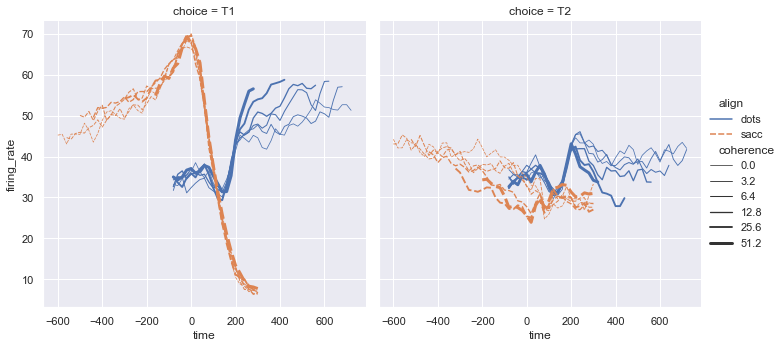

In [38]:
sns.relplot(data = dots,
kind = "line",
x = "time",
y = "firing_rate",
col = "choice",
hue = "align",
size = "coherence",
style = "align", facet_kws=dict(sharex=False))

## Representando agora no `.relplot()` Estimativas e Barras de erro

### Aqui utilizamos o dataset disponibilizado `fmri` pelo seaborn


In [3]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


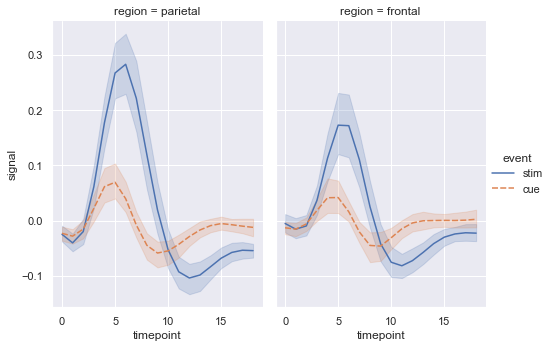

In [48]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event", aspect = .7,
)

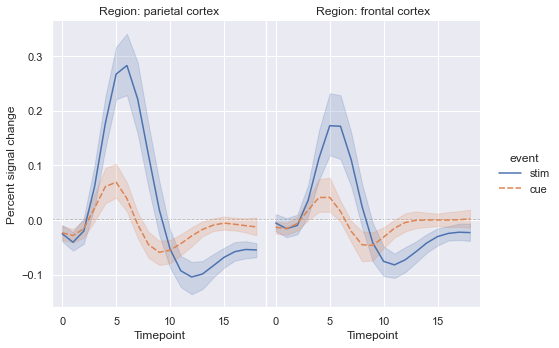

In [4]:


g=sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event", aspect = .7,
)

### Usando pyplot para mudar nomenclaturas de eixo, títulos etc

import matplotlib.pyplot as plt

(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))

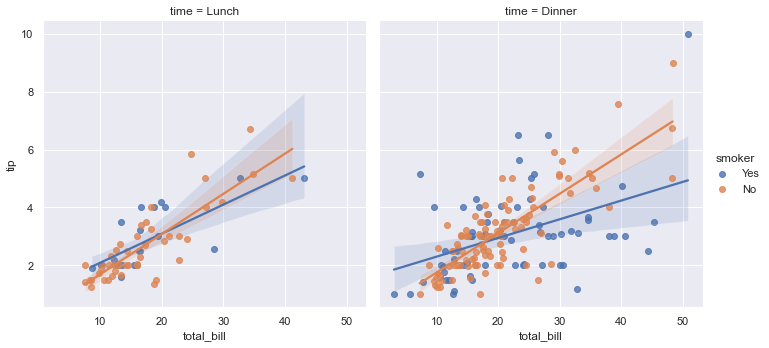

In [45]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Sumário informativo da distribuição dos dados

# Usando a função `.displot()`

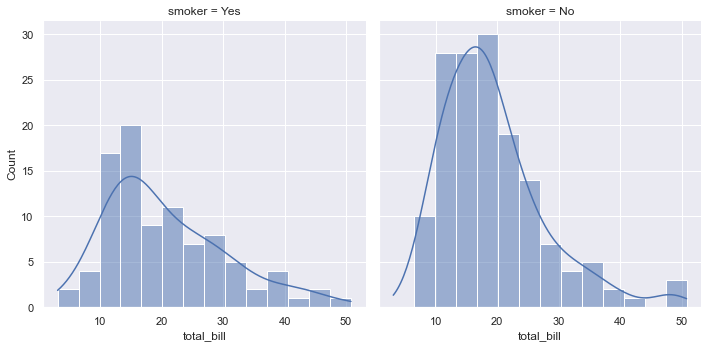

In [60]:
sns.displot(data=tips, x="total_bill", col="smoker", kde=True)

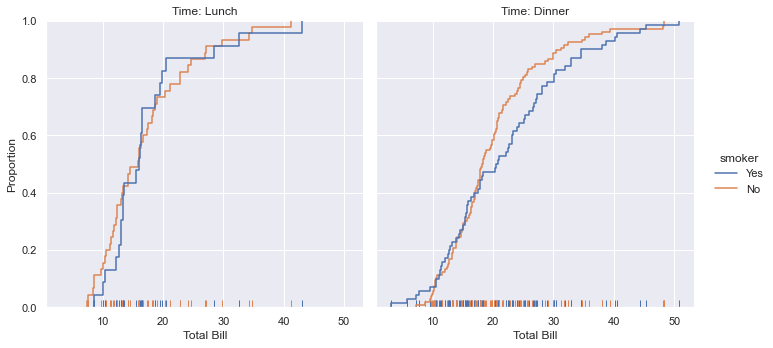

In [9]:
### Plotando a Distribuição Cumulativa

ecdf = sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

ecdf.set_axis_labels("Total Bill", "Proportion").set_titles("Time: {col_name}")

# Gráficos especializados para dados Categóricos

### Usando `.catplot()`

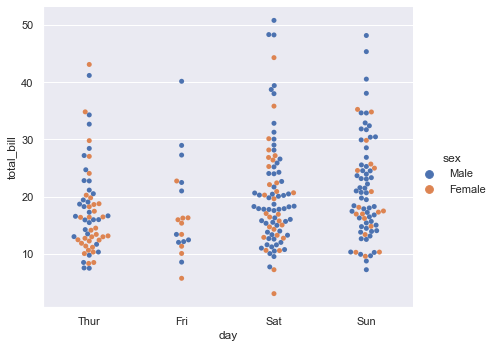

In [75]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="sex", aspect = 1.2)

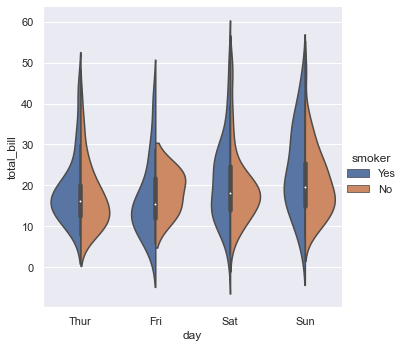

In [12]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

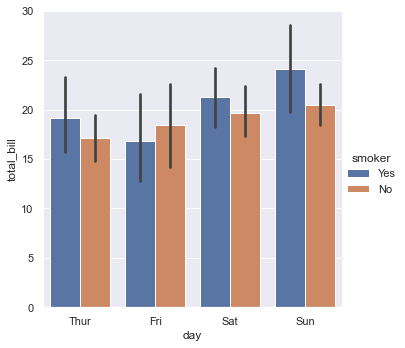

In [17]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "bar", hue = "smoker")

## Visualizações Compostas em multivariáveis

### Utilizando o dataset "penguins"

### Veremos a função `.joinplot()` e `.pairplot()`

In [27]:
penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


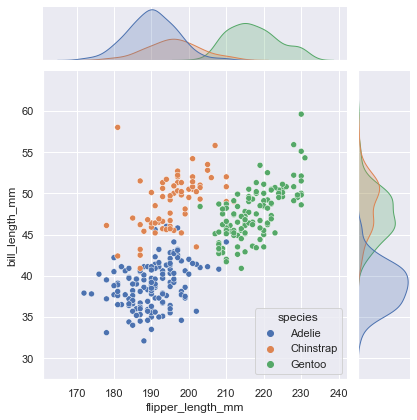

In [30]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")


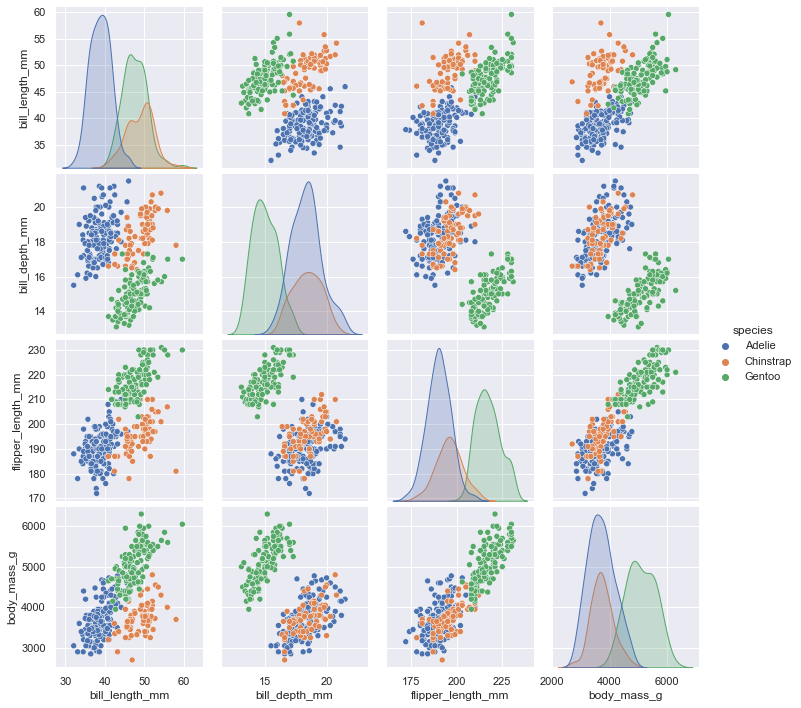

In [31]:
sns.pairplot(data = penguins, hue = "species")

## Classes e funções para Gráficos compléxicos

# Manipulando "Grads", eixos e "labels"

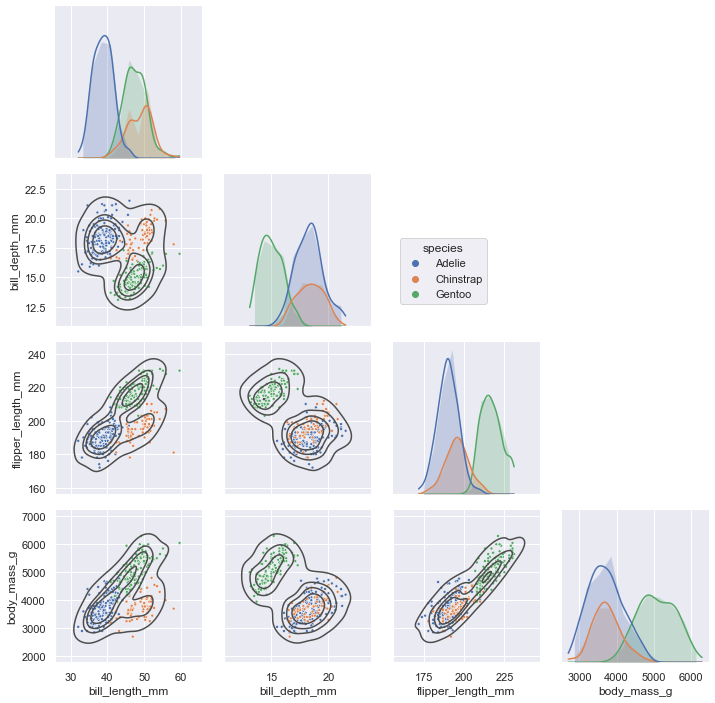

In [64]:
g = sns.PairGrid(penguins, hue="species", corner=True) ### Parâmetro corner = Visualiza metade da matriz de gráficos

### kdeplot = é o plot de camadas; levels = indica mais ou menos camadas
### Color indica transparência das camadas do kdeplot
### map_lower = indica o que vai na parte de baixo do Grid
### map_diag = indica quais gráficos vão na diagonal

g.map_lower(sns.kdeplot, hue=None, levels=5, color=".3") 

g.map_lower(sns.scatterplot, marker=".", color = ".1")

### Kde no Histograma diz se coloca densidade
### linewidht = espessura das linhas das barras
### no histplot, element pode ser "bar", "step" ou "poly"

g.map_diag(sns.histplot, element="poly", linewidth=0, kde=True) 


g.add_legend(frameon=True) ### Frameon diz se vai ter caixa ou não na legenda

g.legend.set_bbox_to_anchor((.61, .6)) ### set_bbox_to_anchor defini a posição da caixa de legenda



## Padrões e customizações

- Veremos um caso em que usamos uma variável contínua no parâmetro `hue` 
- Customizaremos esse mesmo gráfico

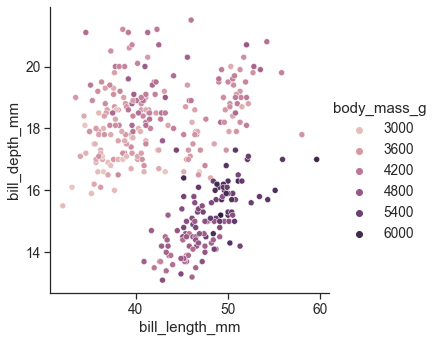

In [68]:


sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)


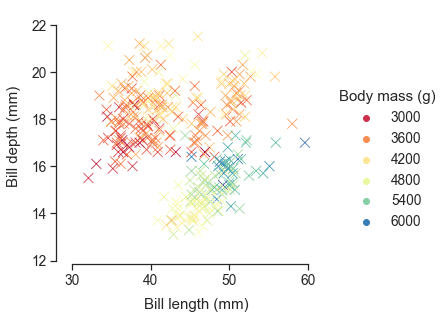

In [101]:

### Primeiro modificaremos as escalas e background
### style altera o background, podendo ser darkgrid, whitegrid, dark, white, ticks
sns.set_theme(style="ticks", font_scale=1.25)

### Palette = altera a escala de cor - paletas escalares ("flare", "crest", "viridis", "magma", "rocket_r", cubehelix) 
### Marker = altera o formato dos pontos
### s altera o tamanho dos pontos

g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="Spectral", marker="x", s=100,
)

#### labelpad = altera a distância dos labels dos eixos x e y

g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)

g.legend.set_title("Body mass (g)")

g.figure.set_size_inches(6.5, 4.5) ### Altera as dimênsões da figura, mais larga ou mais comprida

g.ax.margins(.15) ### Defini o quão perto ou longe os pontos ficarão dos eixos

g.despine(trim=True) ### despine lida com os ticks dos eixos
